<a href="https://colab.research.google.com/github/DVN111/Flight-Price-Predisction-With-Random-Forest-R2-95-MAPE-6-/blob/main/Flight_Price_Prediction_with_Random_Forest_Regressor_(R2_95_)_%2B_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/flight_dataset.csv")
df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df.shape

(10683, 14)

In [ ]:
df.isnull().isna().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [ ]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


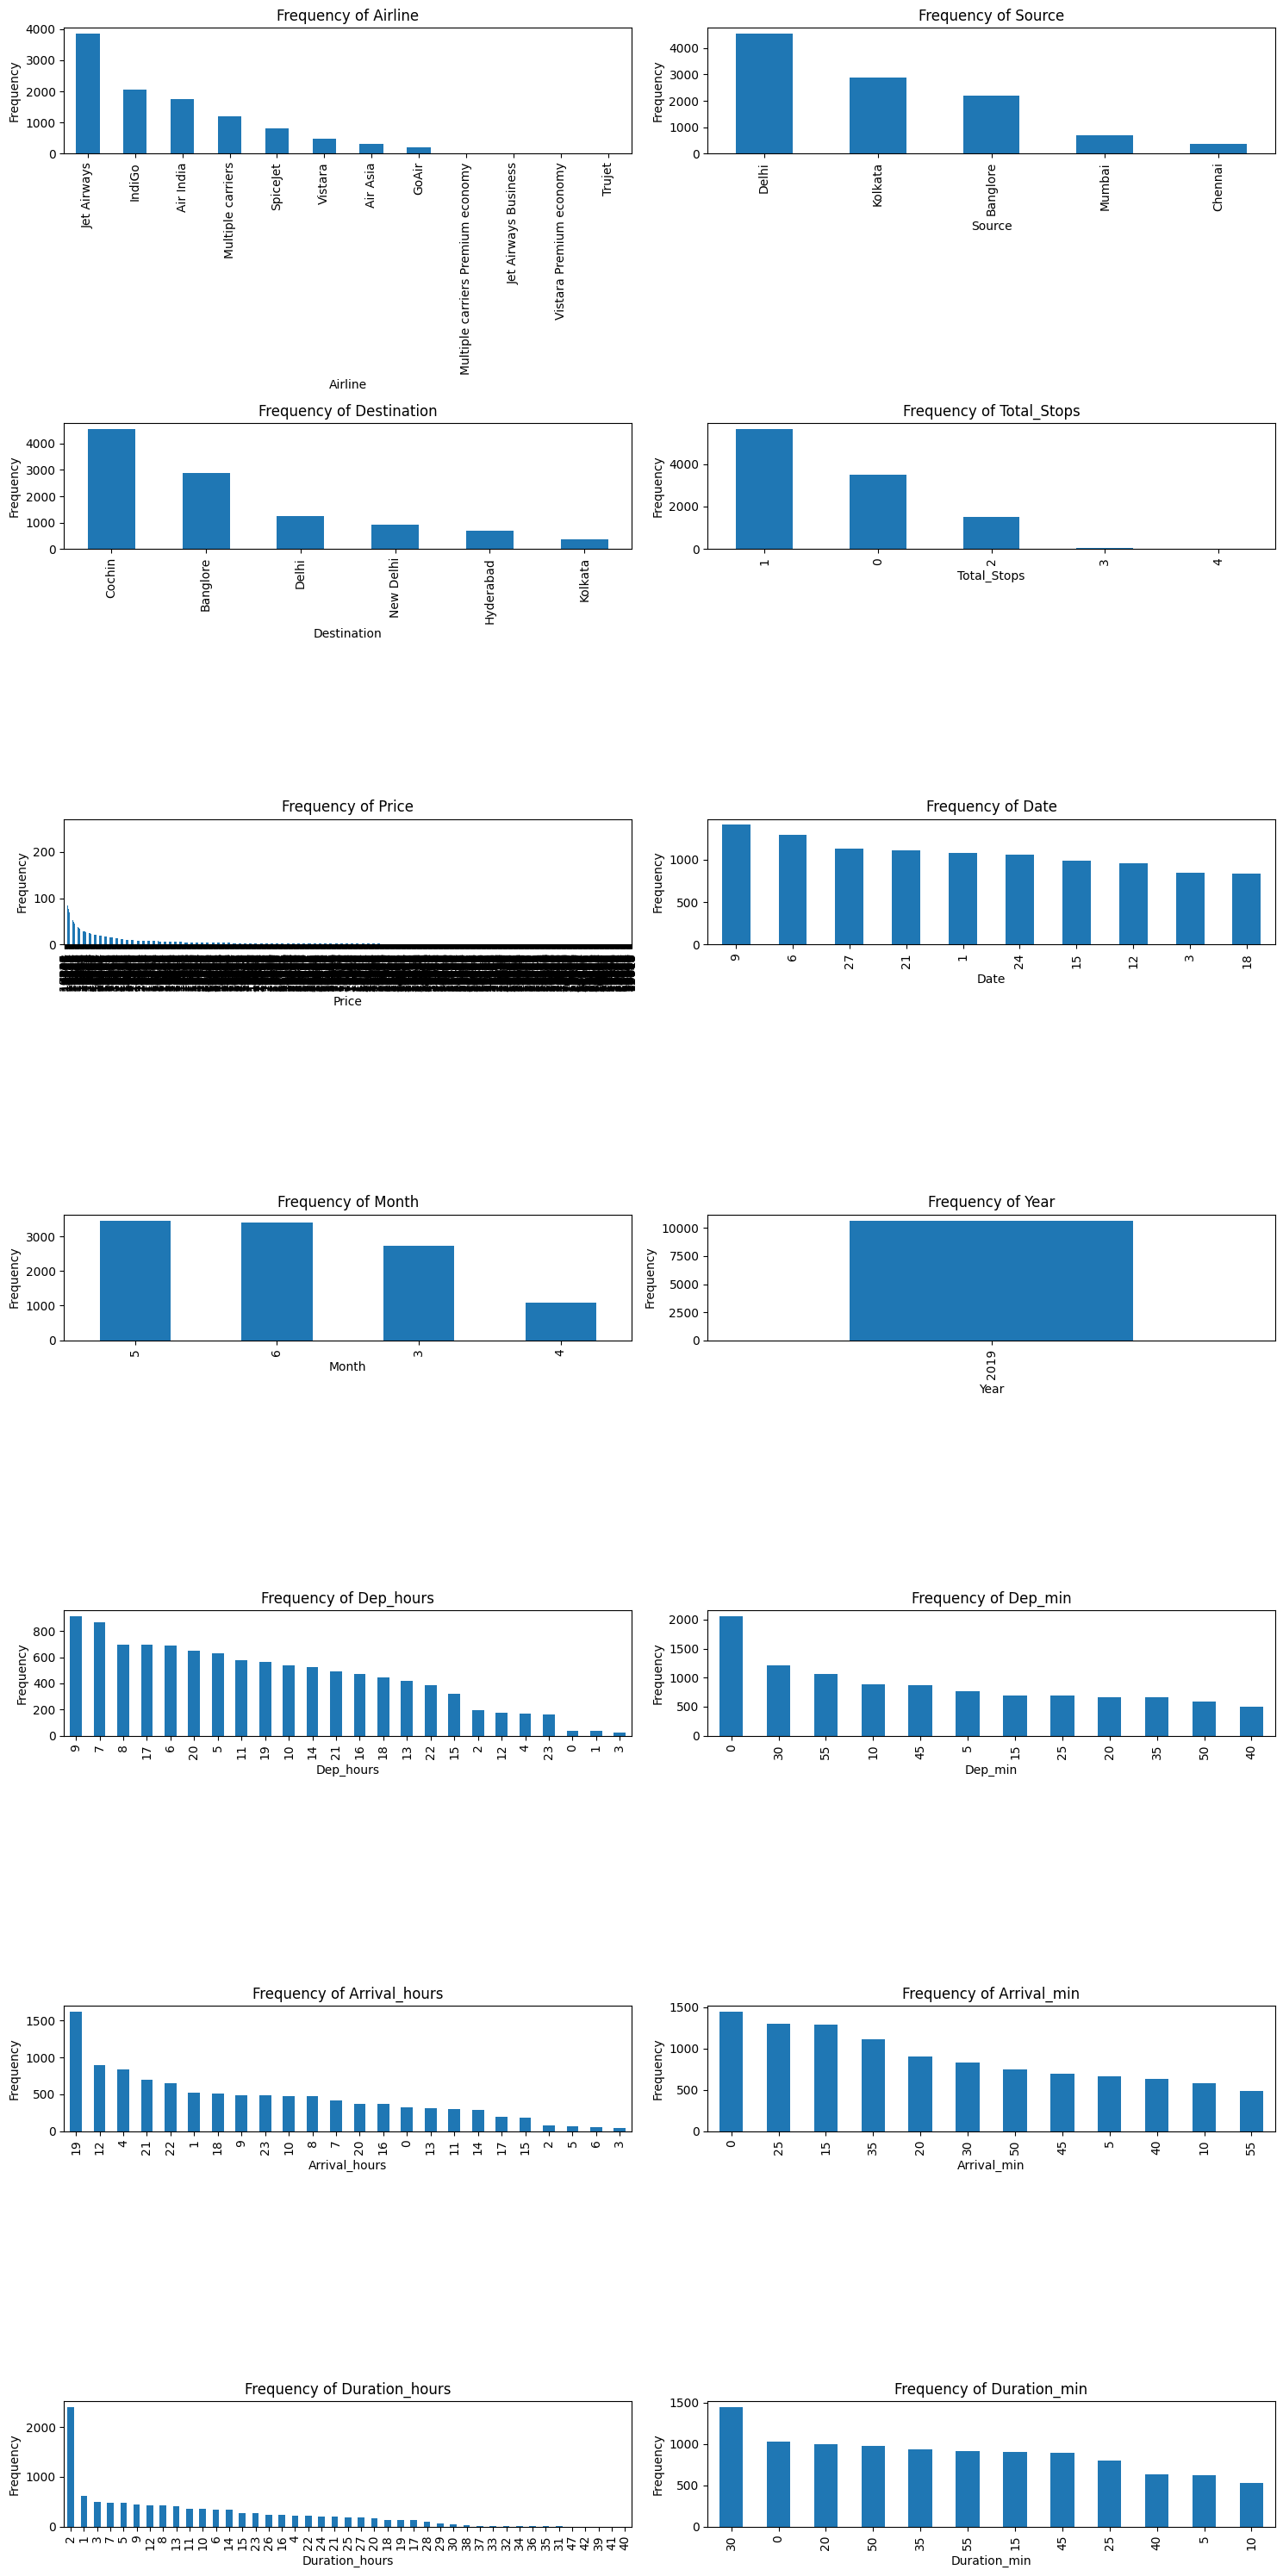

In [ ]:
# Buat plot
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot frequency of each feature
for i, col in enumerate(df.columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=['Year'])

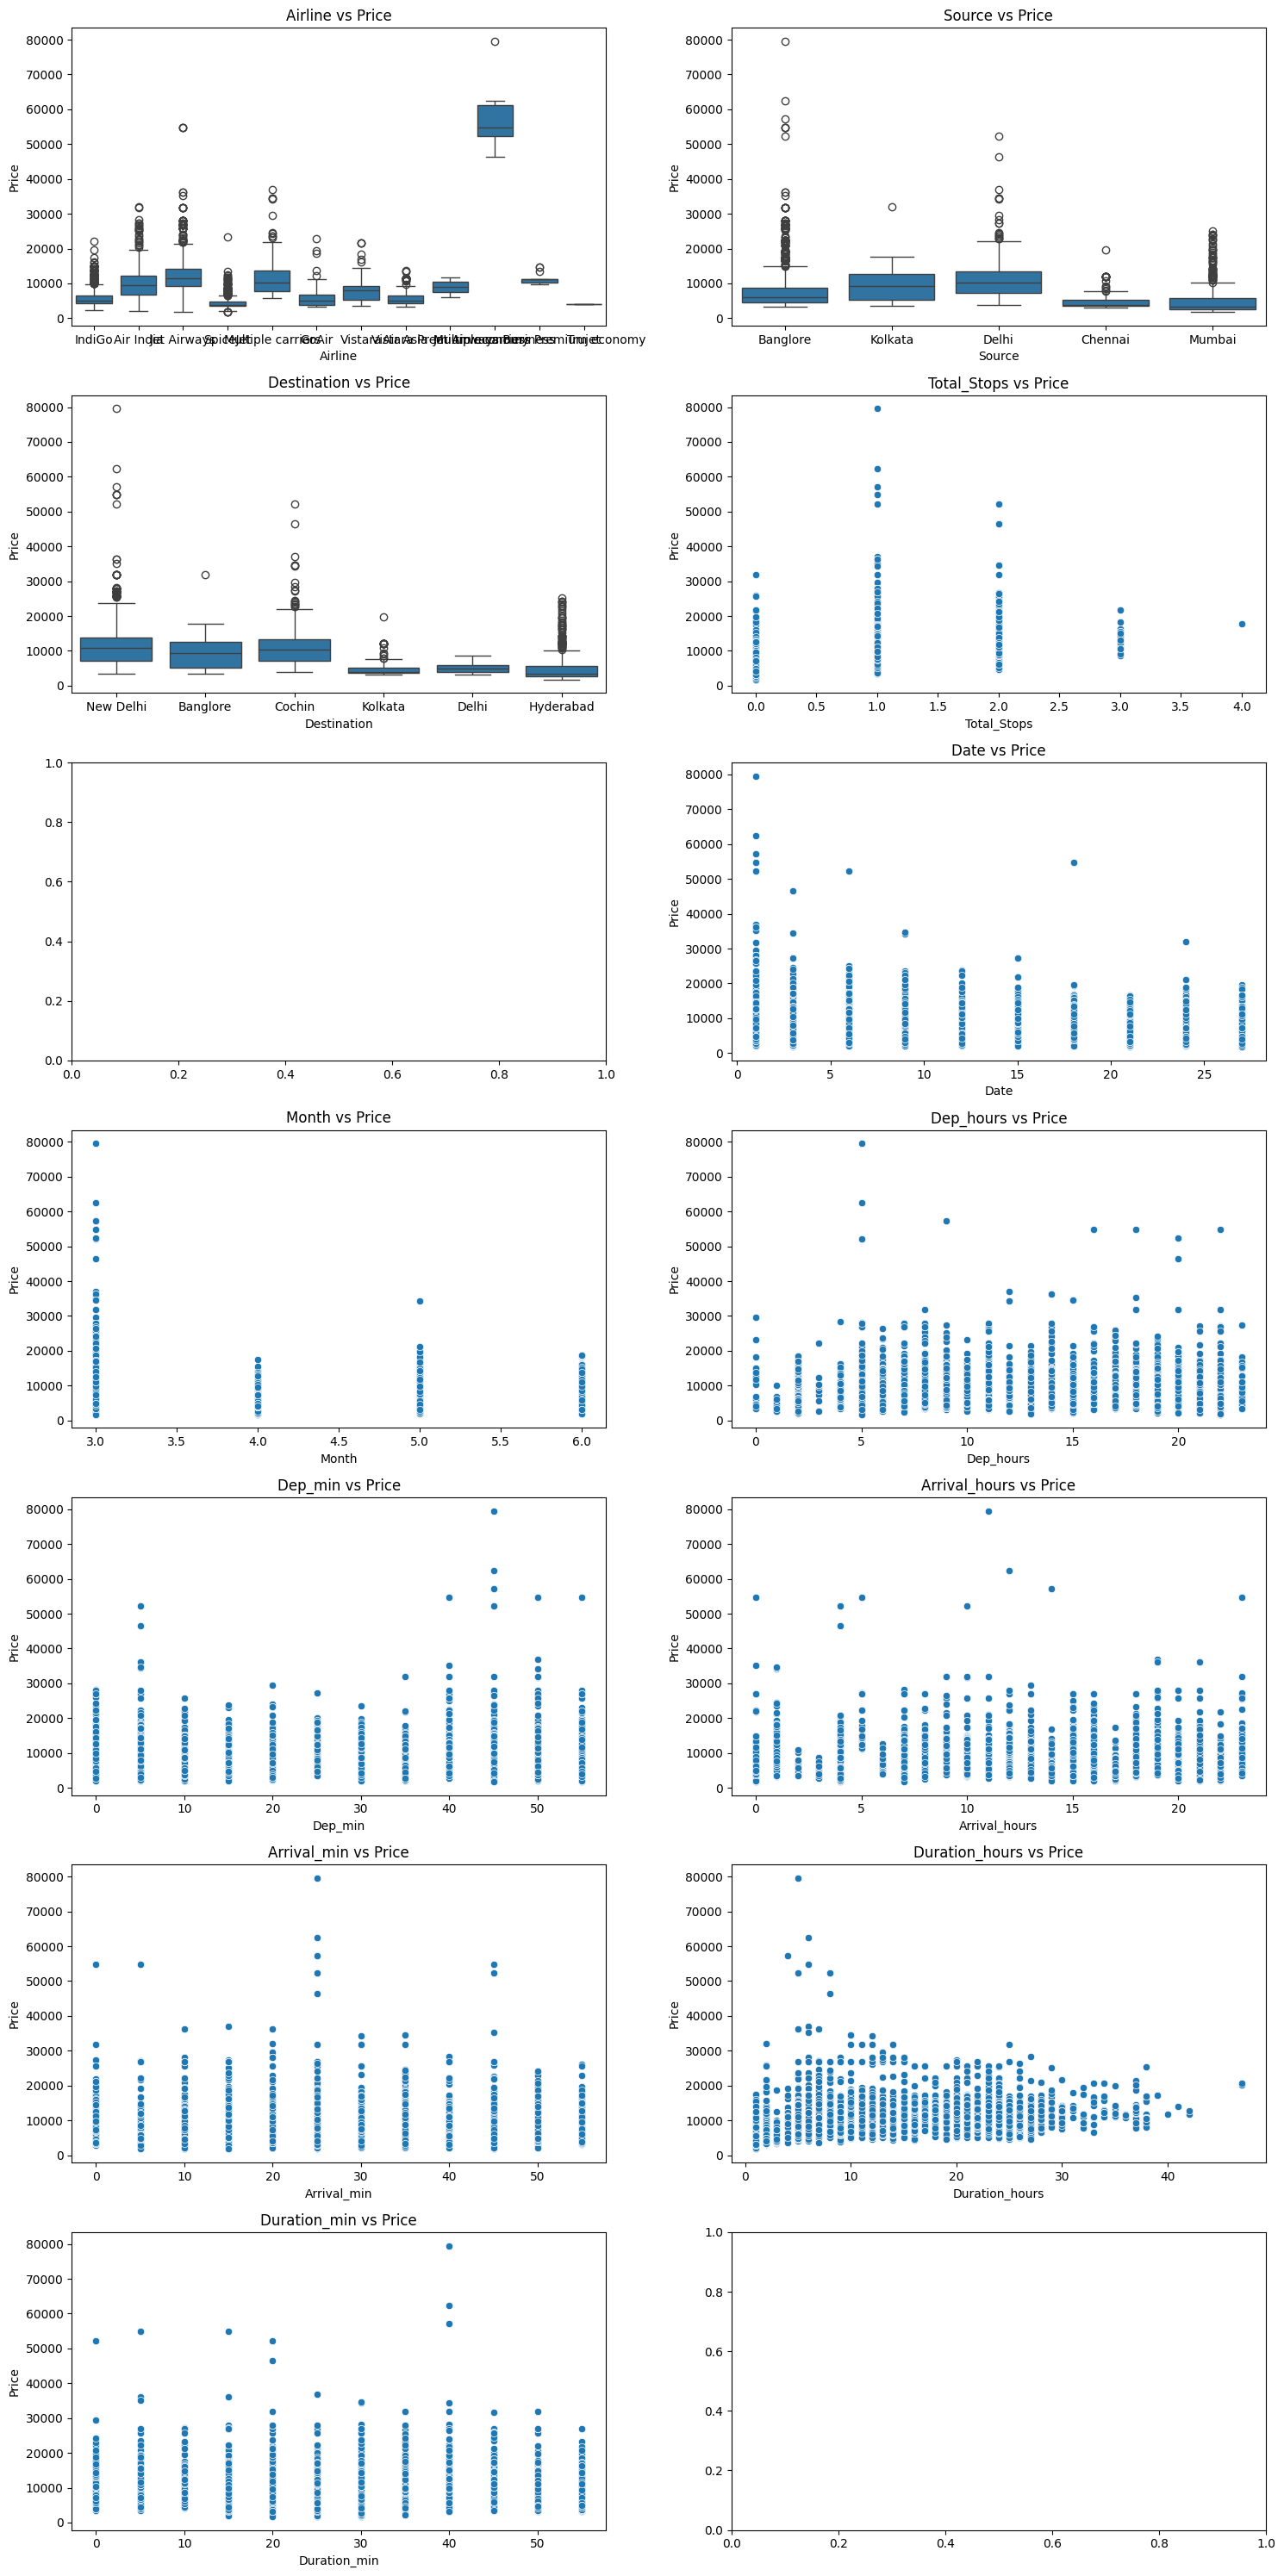

In [ ]:
# Buat plot
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting
for i, col in enumerate(df.columns):
    if col != 'Price':
        if df[col].dtype == 'object':
            sns.boxplot(x=col, y='Price', data=df, ax=axes[i])
        else:
            sns.scatterplot(x=col, y='Price', data=df, ax=axes[i])
        axes[i].set_title(f'{col} vs Price')

# Adjust layout
plt.tight_layout()
plt.show()

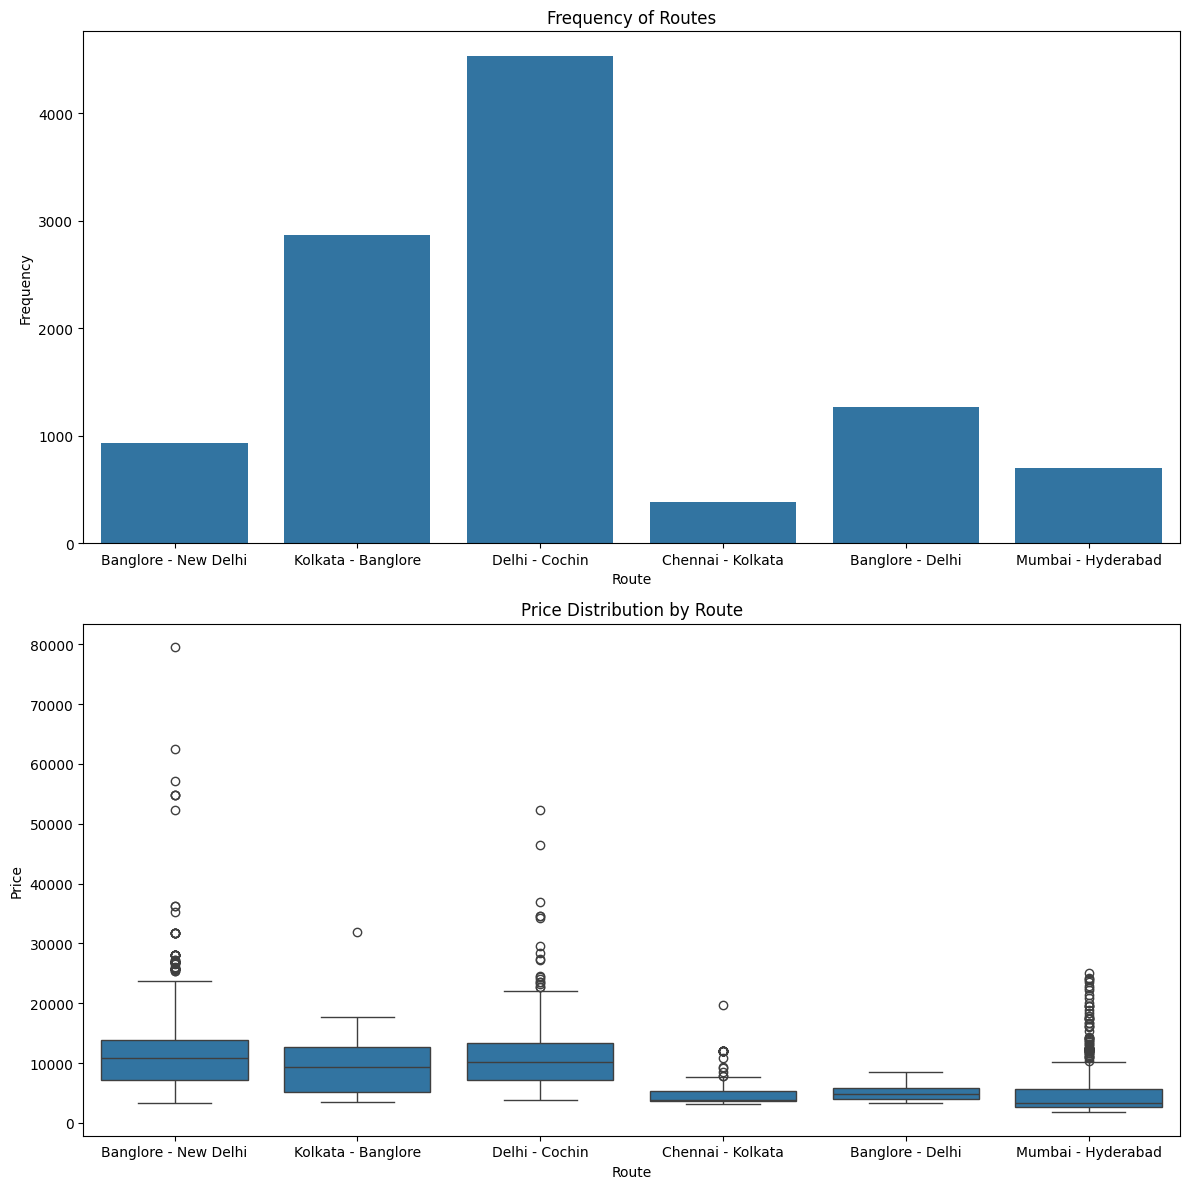

In [ ]:
# Buat kolom kombinasi Source dan Destination
df['Route'] = df['Source'] + ' - ' + df['Destination']

# Buat plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Count plot untuk frekuensi kombinasi Source dan Destination
sns.countplot(x='Route', data=df, ax=axes[0])
axes[0].set_title('Frequency of Routes')
axes[0].set_xlabel('Route')
axes[0].set_ylabel('Frequency')

# Box plot untuk harga dari kombinasi Source dan Destination
sns.boxplot(x='Route', y='Price', data=df, ax=axes[1])
axes[1].set_title('Price Distribution by Route')
axes[1].set_xlabel('Route')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df.head()
df= df.drop(columns=['Route'])
price_column = df.pop('Price')  # Pindahkan kolom 'Price' dan simpan ke dalam variabel
df['Price'] = price_column

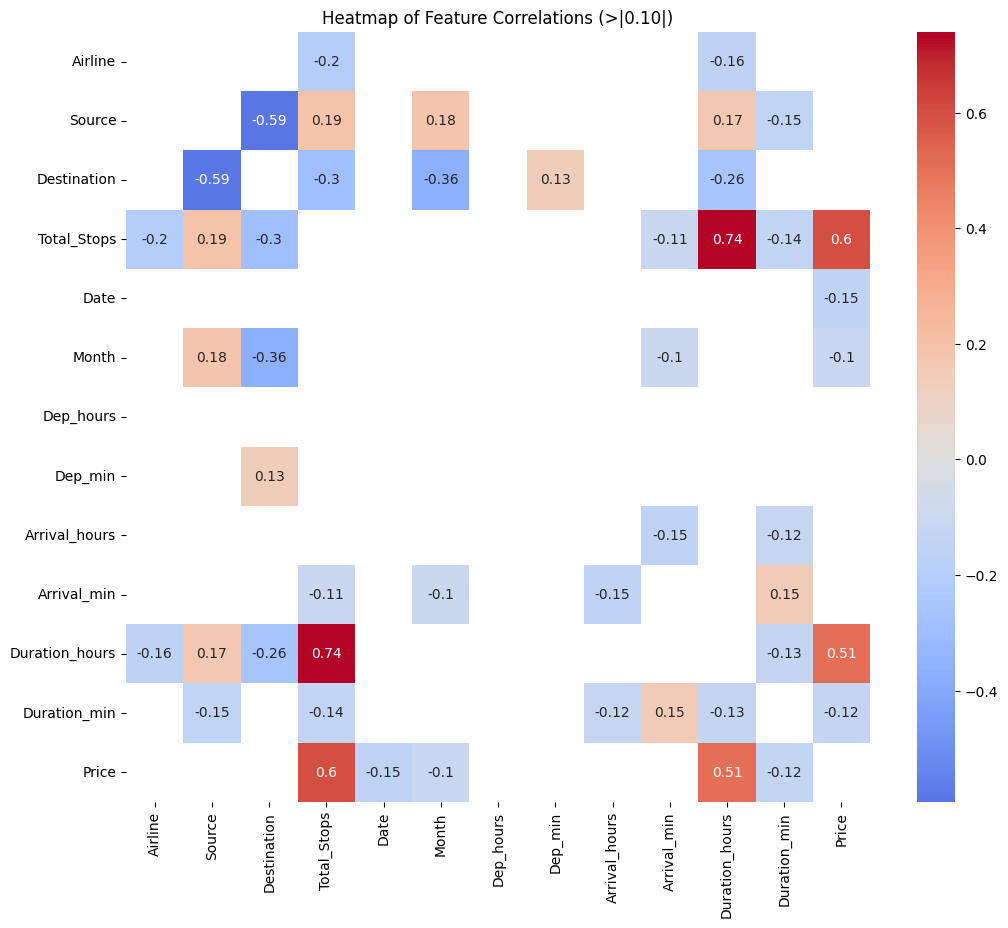

Mean Squared Error (MSE): 1127677.28
R-squared (R2): 0.95
Mean Absolute Percentage Error (MAPE): 6.62%


In [ ]:

# Label encoding for categorical variables
label_encoders = {}
for column in ['Airline', 'Source', 'Destination']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


# Heatmap of correlations with specified threshold
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Filter korelasi yang lebih besar dari 0.10 atau kurang dari -0.10
high_corr = correlation_matrix[((correlation_matrix >= 0.10) | (correlation_matrix <= -0.10)) & (correlation_matrix != 1)]

sns.heatmap(high_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Correlations (>|0.10|)')
plt.show()

# Feature importance using RandomForestRegressor
X = df.drop('Price', axis=1)
y = df['Price']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Evaluasi model menggunakan MSE dan R-squared
# Evaluasi model menggunakan MSE, R-squared, dan MAPE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE) calculation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


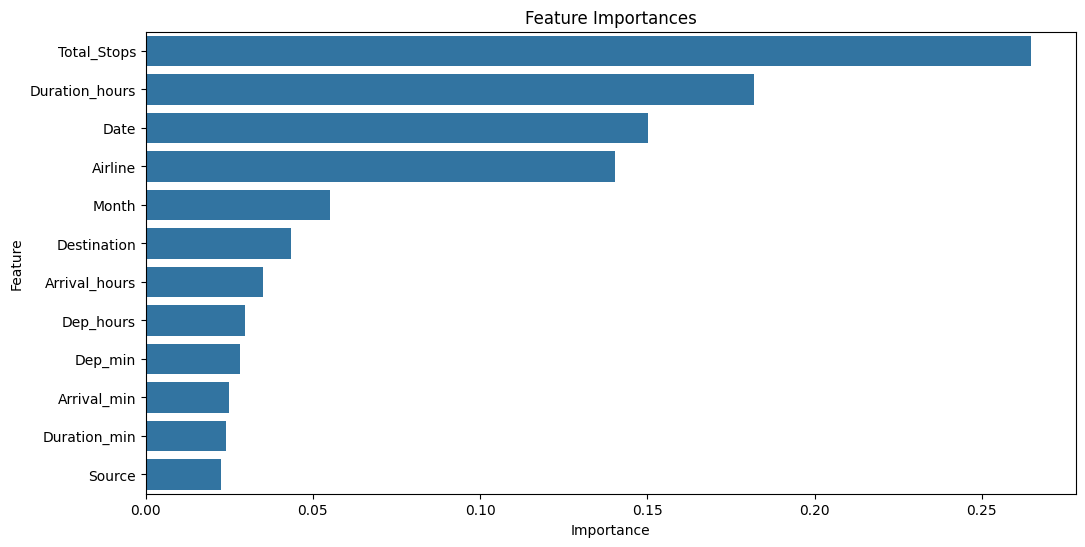

In [ ]:
# Sorting feature importances
feature_importances = model.feature_importances_
features = X.columns

# Sort indices by importance
indices = np.argsort(feature_importances)[::-1]

# Rearrange features and importances based on sorted indices
sorted_feature_importances = feature_importances[indices]
sorted_features = features[indices]

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances, y=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()